# To understand what a RGB/RGBA channel is, we have to dip drive into the image infrastructure first which is actually digital composition.

Over here, we try to make a sort of sense of understanding how differentiation of number/digit with respective to the channel makes different colors and transparency.

In this article, we try to get some hand on experience. To do so, we need to read CSV file and have to call some library as well.

In [1]:
#Importing Required Library.

import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
one = pd.read_csv("One.csv",index_col=["INDEX"])
one

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col15,Col16
INDEX,,,,,,,,,,,,,,,,
Row1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Row2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Row3,0,0,0,0,0,0,0,225,225,0,0,0,0,0,0,0
Row4,0,0,0,0,0,0,0,225,225,0,0,0,0,0,0,0
Row5,0,0,0,0,0,0,225,225,225,225,0,0,0,0,0,0
Row6,0,0,0,0,0,225,225,225,225,225,0,0,0,0,0,0
Row7,0,0,0,0,225,225,225,225,225,225,0,0,0,0,0,0
Row8,0,0,0,225,225,225,225,225,225,225,0,0,0,0,0,0
Row9,0,0,225,225,225,0,225,225,225,225,0,0,0,0,0,0


What we see, a 28x16 matrix having value 0 or 225.  One more insight, out of the matrix values 225 number/ digit having a shape of ONE.  
With our naked eyes, We may consider it as an IMAGE of ONE SIZED Height 28 & Weight 16.    

Let's get started, now it's time to play with numbers. For convenience, we covert this matrix as a (28x16) numpy array. 

In [3]:
array = np.array(one, dtype=np.uint8)
print(array)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 225 225   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 225 225   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 225 225 225 225   0   0   0   0   0   0]
 [  0   0   0   0   0 225 225 225 225 225   0   0   0   0   0   0]
 [  0   0   0   0 225 225 225 225 225 225   0   0   0   0   0   0]
 [  0   0   0 225 225 225 225 225 225 225   0   0   0   0   0   0]
 [  0   0 225 225 225   0 225 225 225 225   0   0   0   0   0   0]
 [  0   0 225 225   0   0 225 225 225 225   0   0   0   0   0   0]
 [  0   0 225   0   0   0 225 225 225 225   0   0   0   0   0   0]
 [  0   0   0   0   0   0 225 225 225 225   0   0   0   0   0   0]
 [  0   0   0   0   0   0 225 225 225 225   0   0   0   0   0   0]
 [  0   0   0   0   0   0 225 225 225 225   0   0   0   0   0   0]
 [  0   0   0   0   0   0 225 225 225 225   0   0   0   0   0 

Looks sounds good, right.

What if we consider it as an IMAGE representing with the values (0 ,225) and two colored image Black & White. Black & White Image basically a gray scale image. Zero represent Black and 225 represent White. What about other values between 0 – 225. We will discuss it later on. Now we will see, 28x16 matrix having value 0 or 225 in a image form how it looks like.  

pil_Image Shape : (28, 16)
pil_Image dtype : uint8
pil_Image size : 448


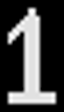

In [4]:
pil_Image = Image.fromarray(array)
print("pil_Image Shape :",array.shape)
print("pil_Image dtype :",array.dtype)
print("pil_Image size :",array.size)
pil_Image.resize((16*4,28*4))

0X0 pixel value : 0 
7X2 pixel value : 225


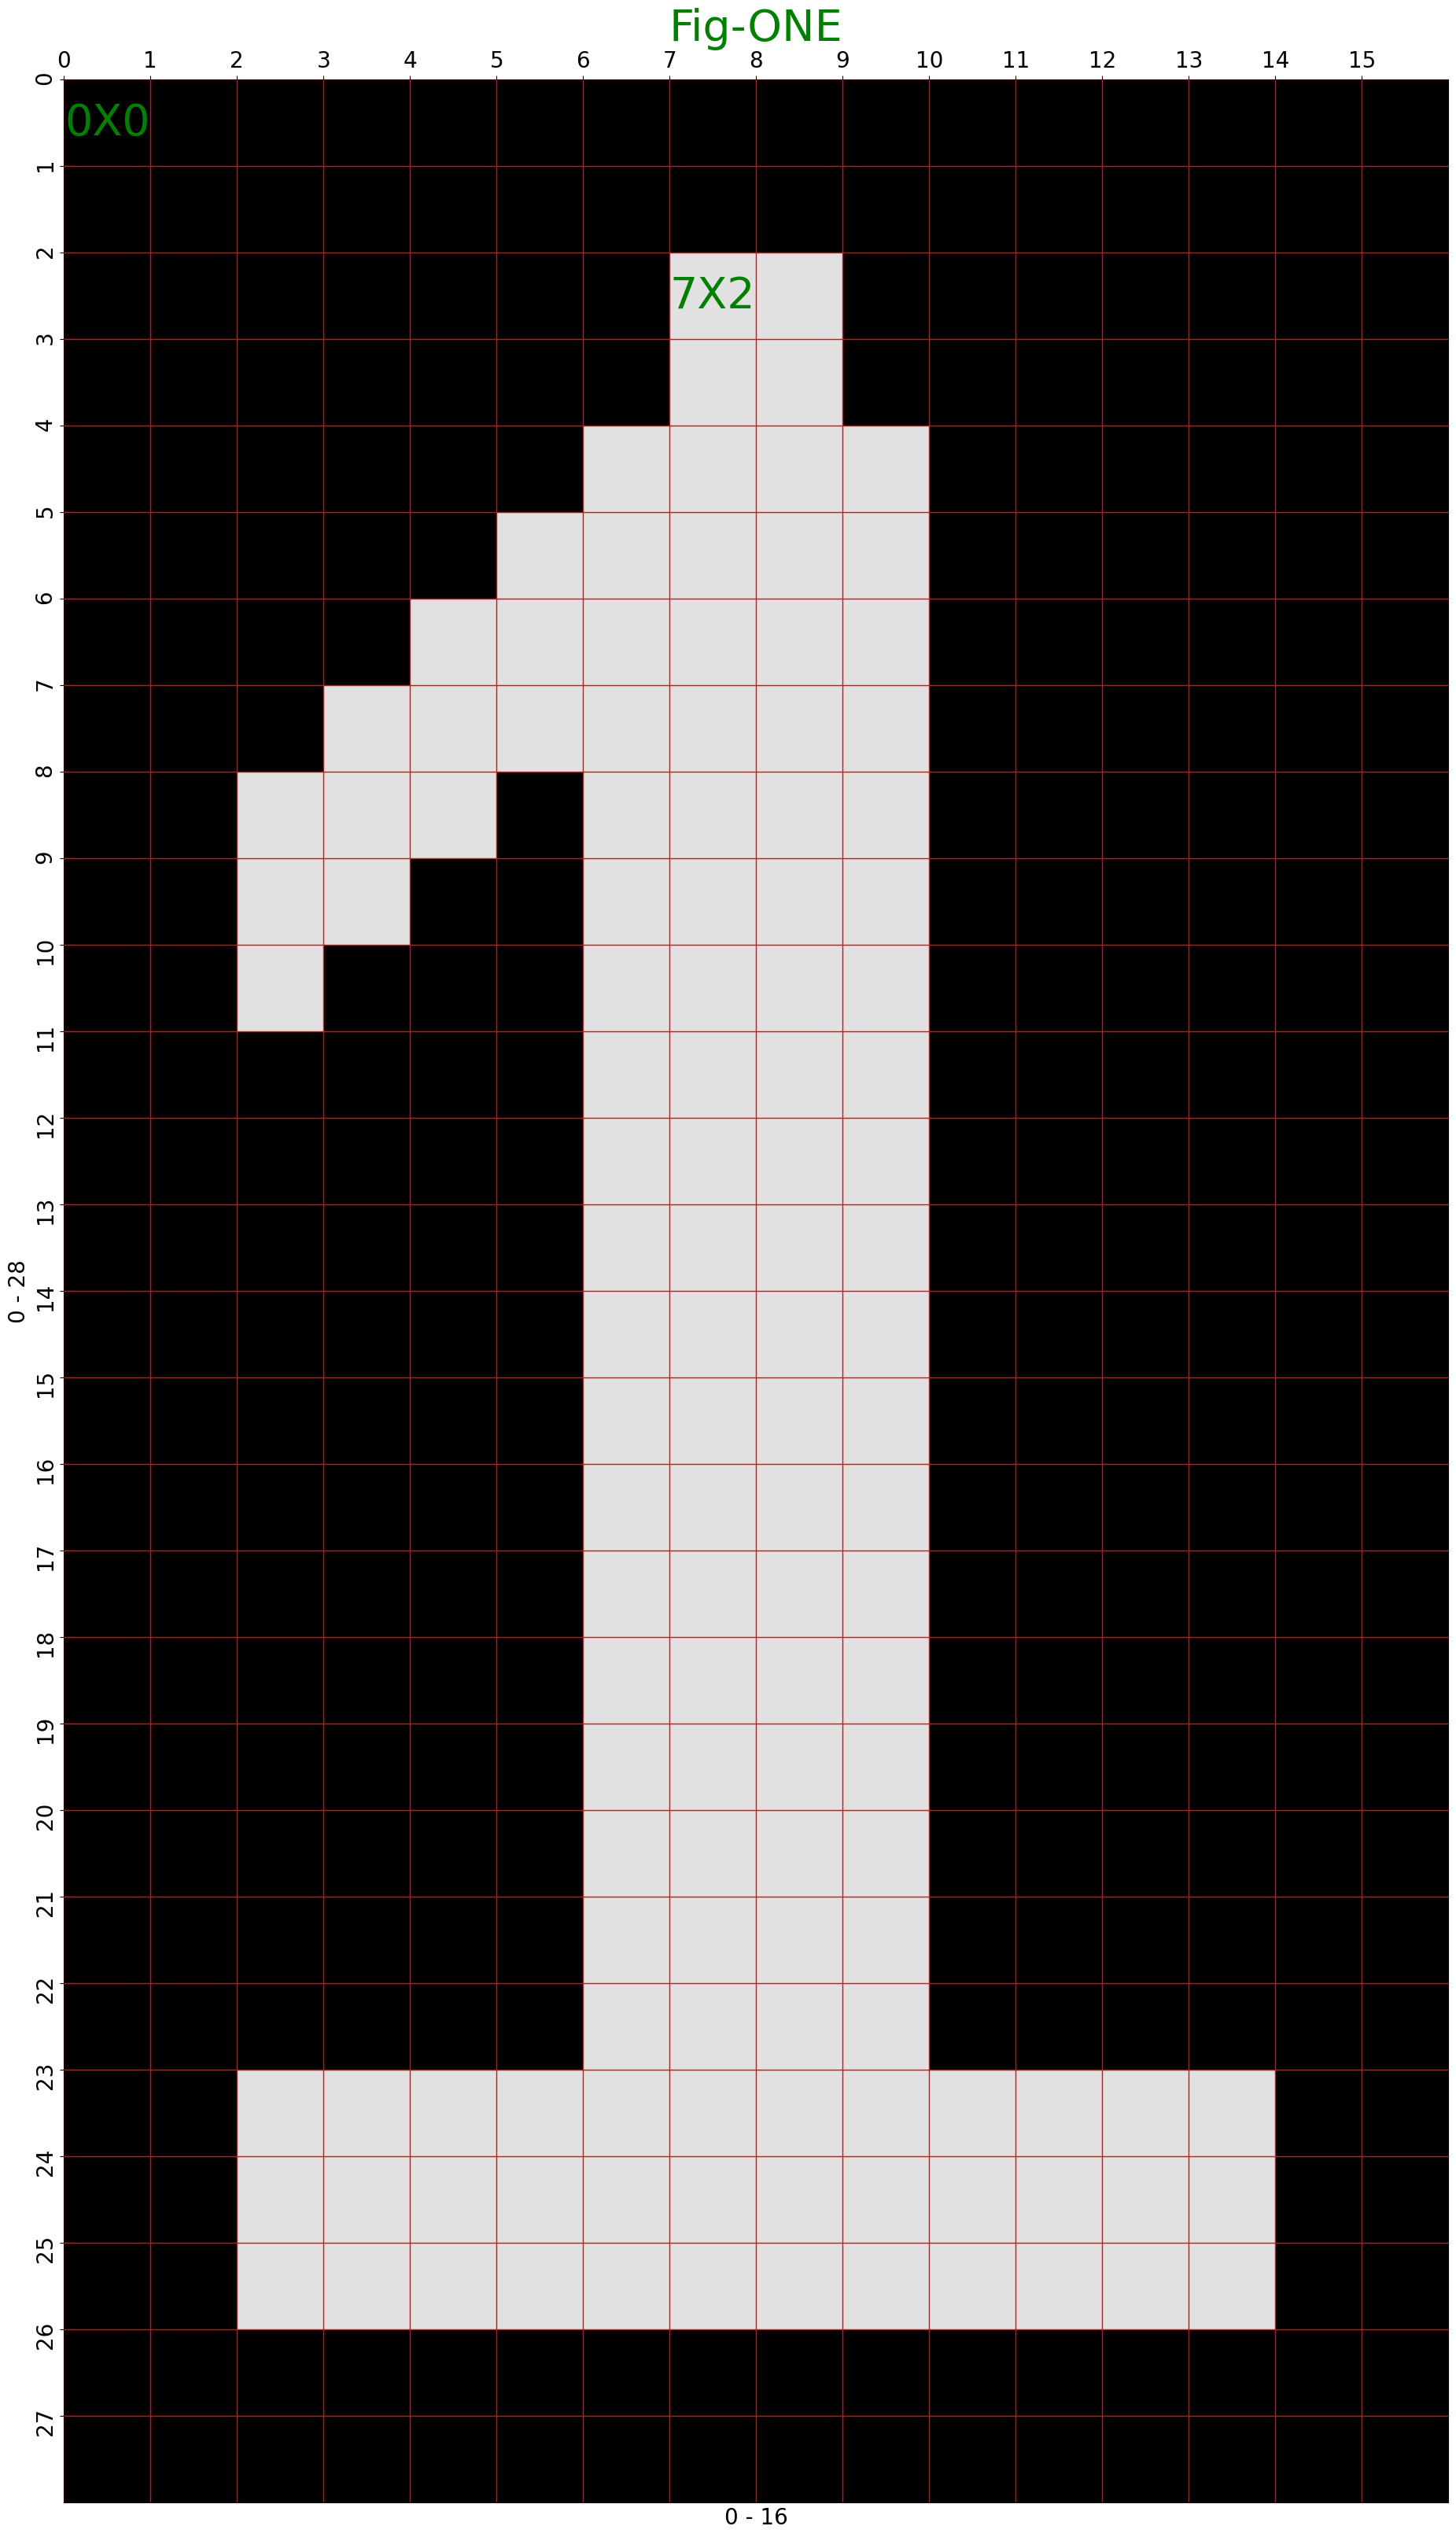

In [5]:
plt.figure(figsize=(28*2.5,16*2.5))
plt.imshow(pil_Image,cmap='gray',vmin=0,vmax=255, extent=[0, 16, 28, 0])
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.xlabel('0 - 16',fontsize=20)
plt.ylabel('0 - 28',fontsize=20)
plt.title("Fig-ONE", fontsize=40, color="green")
plt.yticks(np.arange(0, 28, step=1),fontsize=20,rotation=90)
plt.xticks(np.arange(0, 16, step=1),fontsize=20,rotation=360)
plt.grid(axis='both',color='r', linestyle='-', linewidth=1)
plt.text(0.5,0.5,"0X0",fontsize=40, color='g',horizontalalignment='center',verticalalignment='center')
plt.text(7.5,2.5,"7X2",fontsize=40, color='g',horizontalalignment='center',verticalalignment='center')
plt.savefig('one.png')
print("0X0 pixel value :", pil_Image.getpixel((0,0)), "\n7X2 pixel value :", pil_Image.getpixel((7,2)))
plt.show()


Since above showed Fig-ONE is a single Band/ Channel/ Gray Scale Image, one dimensional pixel value. Later on, we work with RGB or RGBA (3 Channel or 4 Channel).  Now we see the digital presentation of (0-255) 256 values in an image.     

In [6]:
# Read a CSV file 
blackwhite = pd.read_csv("blackwhite.csv",index_col=["INDEX"])
blackwhite

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col247,Col248,Col249,Col250,Col251,Col252,Col253,Col254,Col255,Col256
INDEX,,,,,,,,,,,,,,,,,,,,,
Row1,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
Row2,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
Row3,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
Row4,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
Row5,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
Row6,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
Row7,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255


For convenient operation:
CSV dataframe converted into a numpy array and data type uint8 which is 8bit range from 0 to 255

In [7]:
blackwhite_array = np.array(blackwhite, dtype=np.uint8)
print("blackwhite_array Shape:", blackwhite_array.shape)
print("blackwhite_array Data Type: ",blackwhite_array.dtype)
print("blackwhite_array: \n",blackwhite_array)

blackwhite_array Shape: (7, 256)
blackwhite_array Data Type:  uint8
blackwhite_array: 
 [[  0   1   2 ... 253 254 255]
 [  0   1   2 ... 253 254 255]
 [  0   1   2 ... 253 254 255]
 ...
 [  0   1   2 ... 253 254 255]
 [  0   1   2 ... 253 254 255]
 [  0   1   2 ... 253 254 255]]


Range of color Black to white (0 -- 225). Lets see the Plot of blackwhite_array

In [8]:
blackwhite = Image.fromarray(blackwhite_array,mode="L")
blackwhite.resize((256*4,7*4))

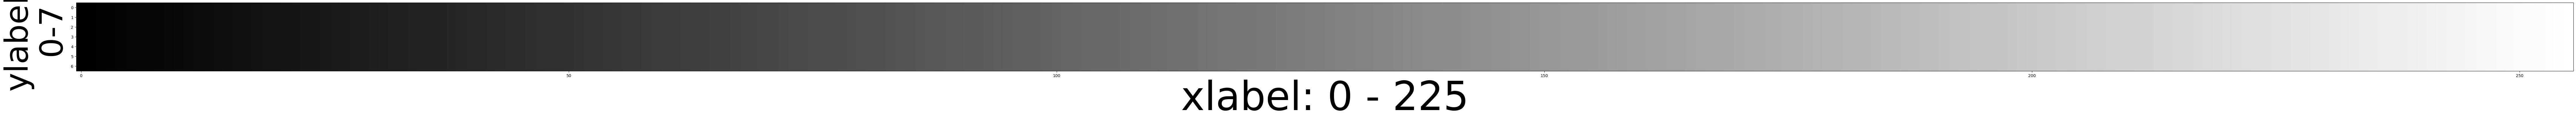

In [9]:
plt.figure(figsize=(28*4,16*4))
plt.imshow(blackwhite,cmap='gray')
plt.xlabel("xlabel: 0 - 225", fontsize=100)
plt.ylabel("ylabel:\n 0-7",fontsize=80)
plt.show()


Very first time, we create a 28X16 numpy array having value 0 and 128 which is belong to 0-255. To access a numpy array, 3rd row and 8th column, we have to index number staring from 0.  With our naked eyes, we can see its 2X7 having 128 value. First row and first column that is 0X0 having value 0

In [10]:
arrayPixelVale128= np.where(array==0,0,128).astype(np.uint8)
print("arrayPixelVale128.shape :",arrayPixelVale128.shape)
print("arrayPixelVale128.dtype :",arrayPixelVale128.dtype)
print("arrayPixelVale128[2][7] :",arrayPixelVale128[2][7])
print(arrayPixelVale128)

arrayPixelVale128.shape : (28, 16)
arrayPixelVale128.dtype : uint8
arrayPixelVale128[2][7] : 128
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 128 128   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 128 128   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 128 128 128 128   0   0   0   0   0   0]
 [  0   0   0   0   0 128 128 128 128 128   0   0   0   0   0   0]
 [  0   0   0   0 128 128 128 128 128 128   0   0   0   0   0   0]
 [  0   0   0 128 128 128 128 128 128 128   0   0   0   0   0   0]
 [  0   0 128 128 128   0 128 128 128 128   0   0   0   0   0   0]
 [  0   0 128 128   0   0 128 128 128 128   0   0   0   0   0   0]
 [  0   0 128   0   0   0 128 128 128 128   0   0   0   0   0   0]
 [  0   0   0   0   0   0 128 128 128 128   0   0   0   0   0   0]
 [  0   0   0   0   0   0 128 128 128 128   0   0   0   0   0   0]
 [  0   0   0   0   0   0 128 12

An image from that array, how it looks like.  If we access to pixel, 3rd row and 8th column, we have to use Cartesian coordinate system having top left corner as (0,0). With our naked eyes, we can see its 7X2 having 128 value. First row and first column that is 0X0 having value 0. 

pilimage128.size (16, 28) 
0X0 pixel value : 0 
7X2 pixel value : 128


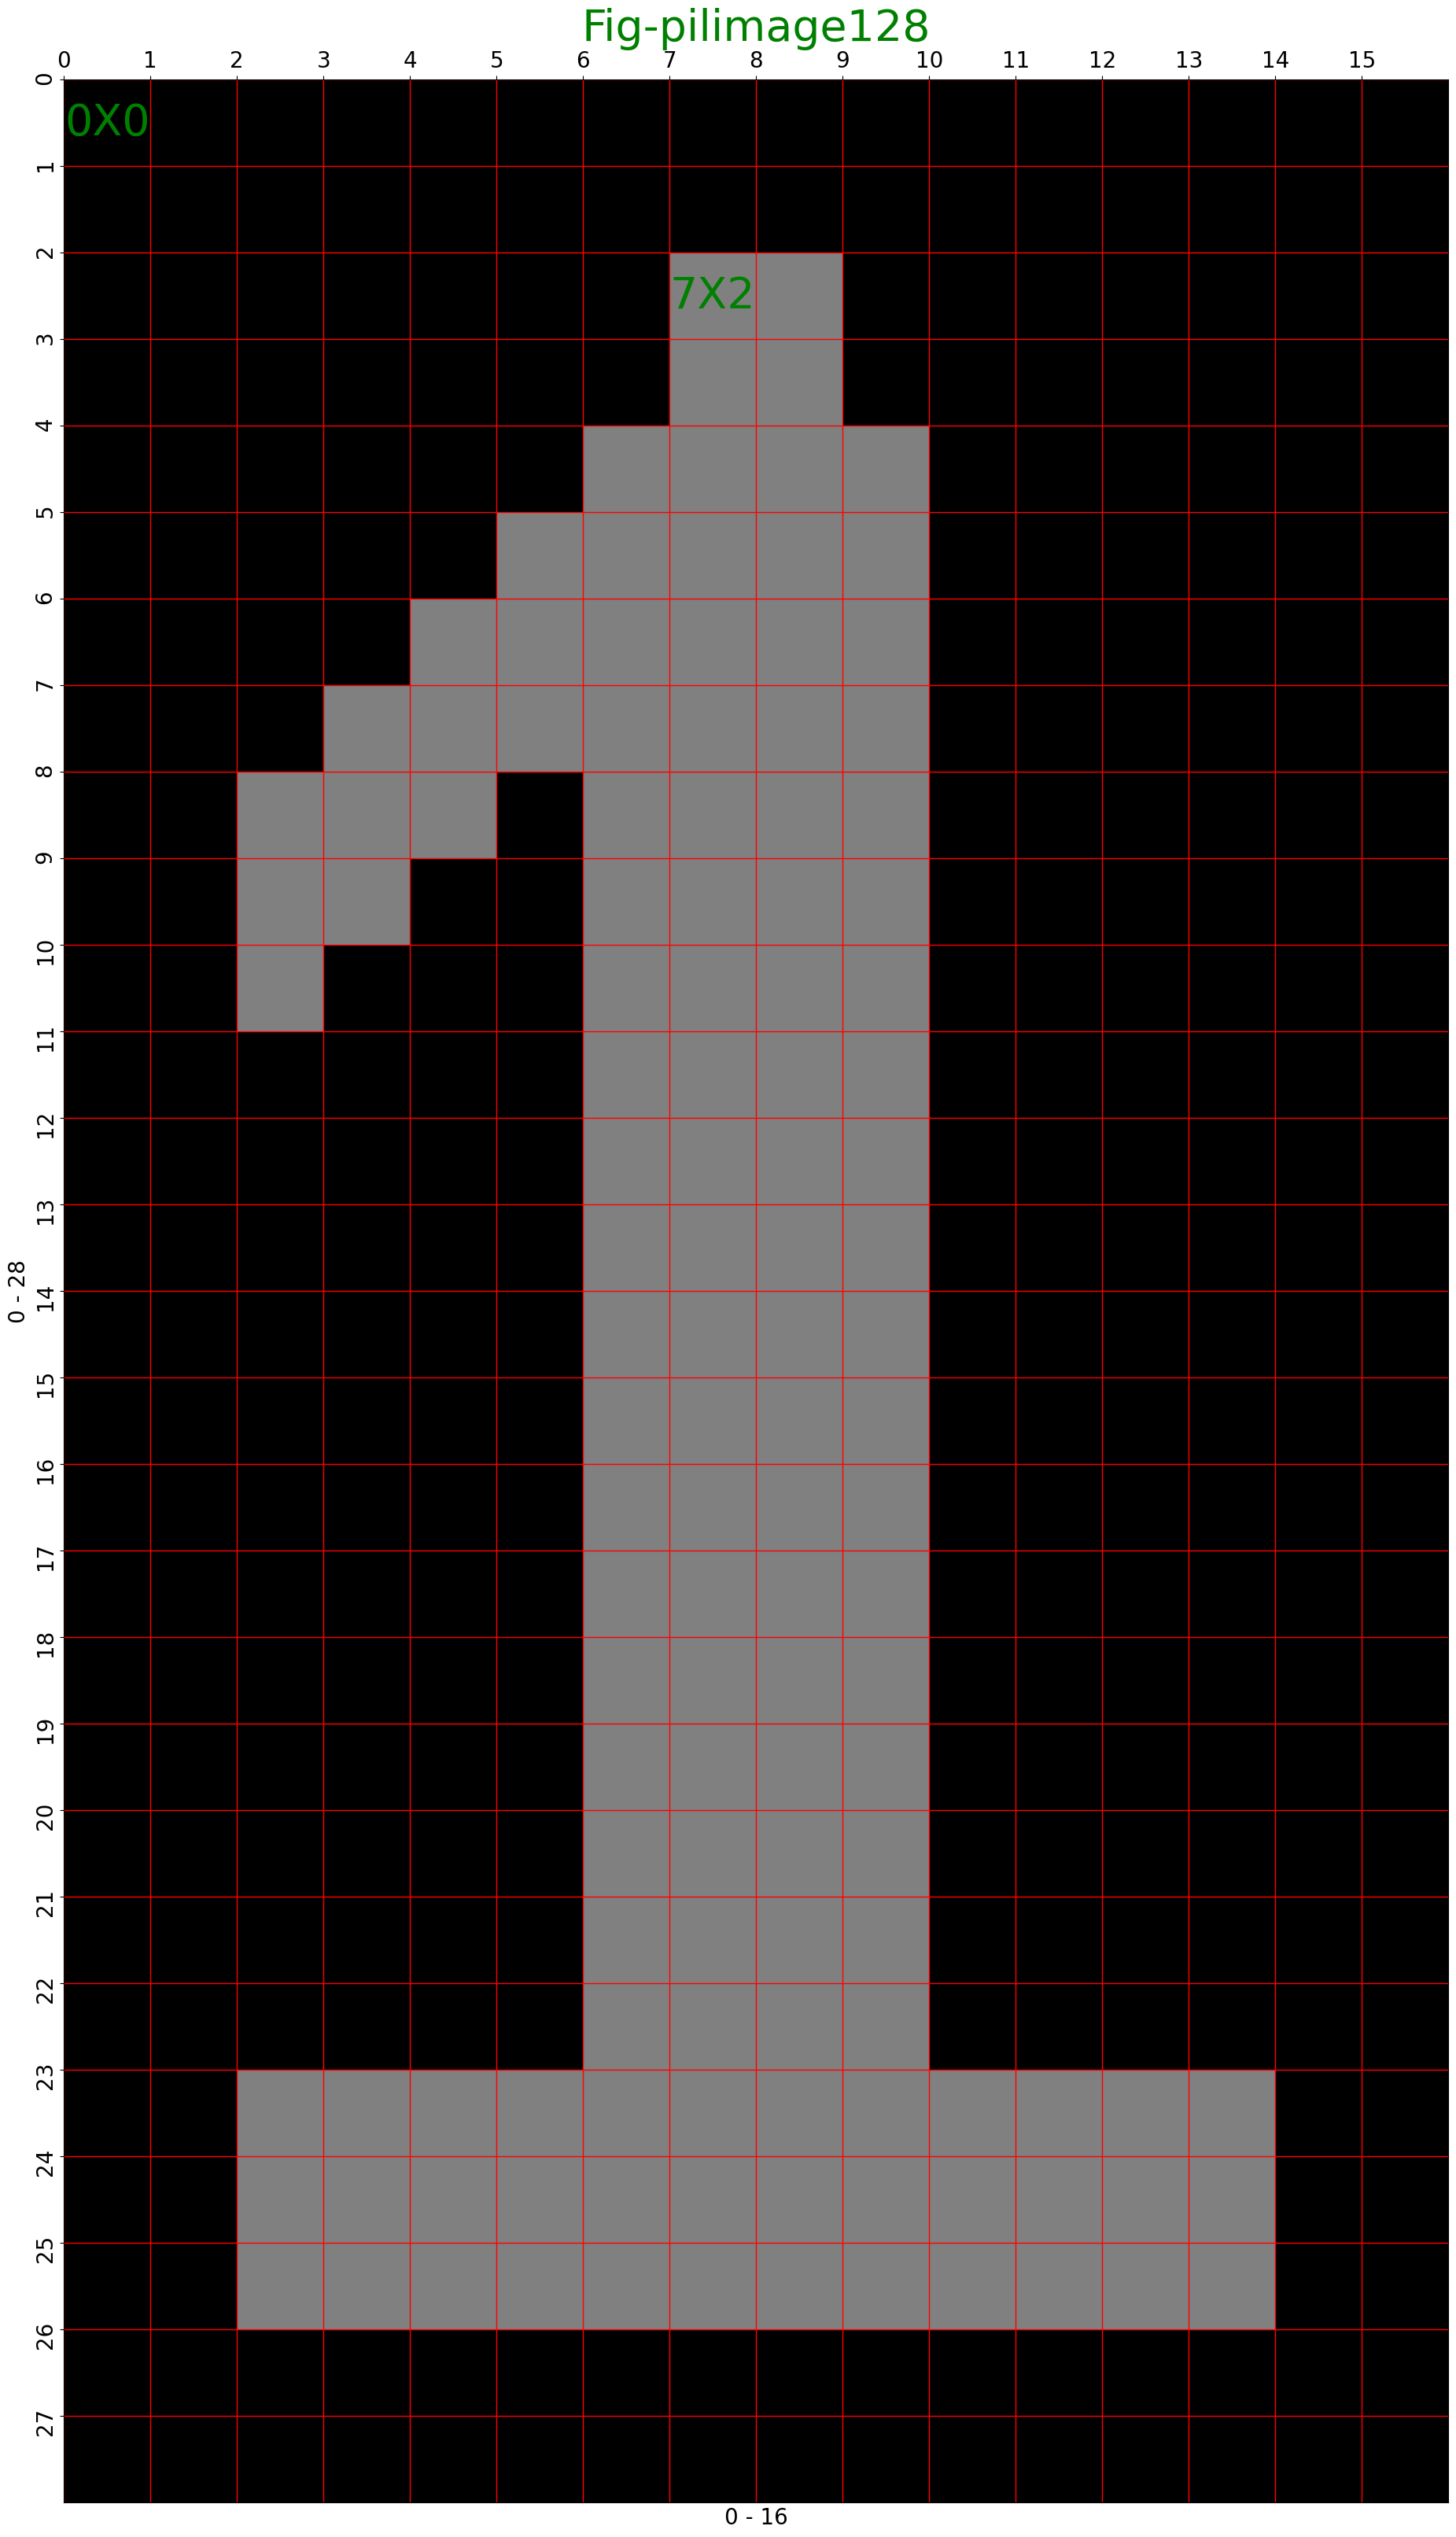

In [11]:
plt.figure(figsize=(28*2.5,16*2.5))
pilimage128= Image.fromarray(arrayPixelVale128)
plt.imshow(pilimage128,cmap='gray',vmin=0,vmax=255, extent=[0, 16, 28, 0])
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.xlabel('0 - 16',fontsize=20)
plt.ylabel('0 - 28',fontsize=20)
plt.title("Fig-pilimage128", fontsize=40, color="green")
plt.yticks(np.arange(0, 28, step=1),fontsize=20,rotation=90)
plt.xticks(np.arange(0, 16, step=1),fontsize=20,rotation=360)
plt.grid(axis='both',color='r', linestyle='-', linewidth=1)
plt.text(0.5,0.5,"0X0",fontsize=40, color='g',horizontalalignment='center',verticalalignment='center')
plt.text(7.5,2.5,"7X2",fontsize=40, color='g',horizontalalignment='center',verticalalignment='center')
plt.savefig('pilimage128.png')
print("pilimage128.size",pilimage128.size,"\n0X0 pixel value :", pilimage128.getpixel((0,0)), "\n7X2 pixel value :", pilimage128.getpixel((7,2)))
plt.show()

In [12]:
arrayPixelVale53= np.where(array==0,0,53).astype(np.uint8)
print("arrayPixelVale53.shape :",arrayPixelVale53.shape)
print("arrayPixelVale53.dtype :",arrayPixelVale53.dtype)
print("arrayPixelVale53[2][7] :",arrayPixelVale53[2][7])
print(arrayPixelVale53)

arrayPixelVale53.shape : (28, 16)
arrayPixelVale53.dtype : uint8
arrayPixelVale53[2][7] : 53
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 53 53  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 53 53  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 53 53 53 53  0  0  0  0  0  0]
 [ 0  0  0  0  0 53 53 53 53 53  0  0  0  0  0  0]
 [ 0  0  0  0 53 53 53 53 53 53  0  0  0  0  0  0]
 [ 0  0  0 53 53 53 53 53 53 53  0  0  0  0  0  0]
 [ 0  0 53 53 53  0 53 53 53 53  0  0  0  0  0  0]
 [ 0  0 53 53  0  0 53 53 53 53  0  0  0  0  0  0]
 [ 0  0 53  0  0  0 53 53 53 53  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 53 53 53 53  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 53 53 53 53  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 53 53 53 53  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 53 53 53 53  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 53 53 53 53  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 53 53 53 53  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 53 53 53 53  0  0  0

0X0 pixel value : 0 
7X2 pixel value : 53


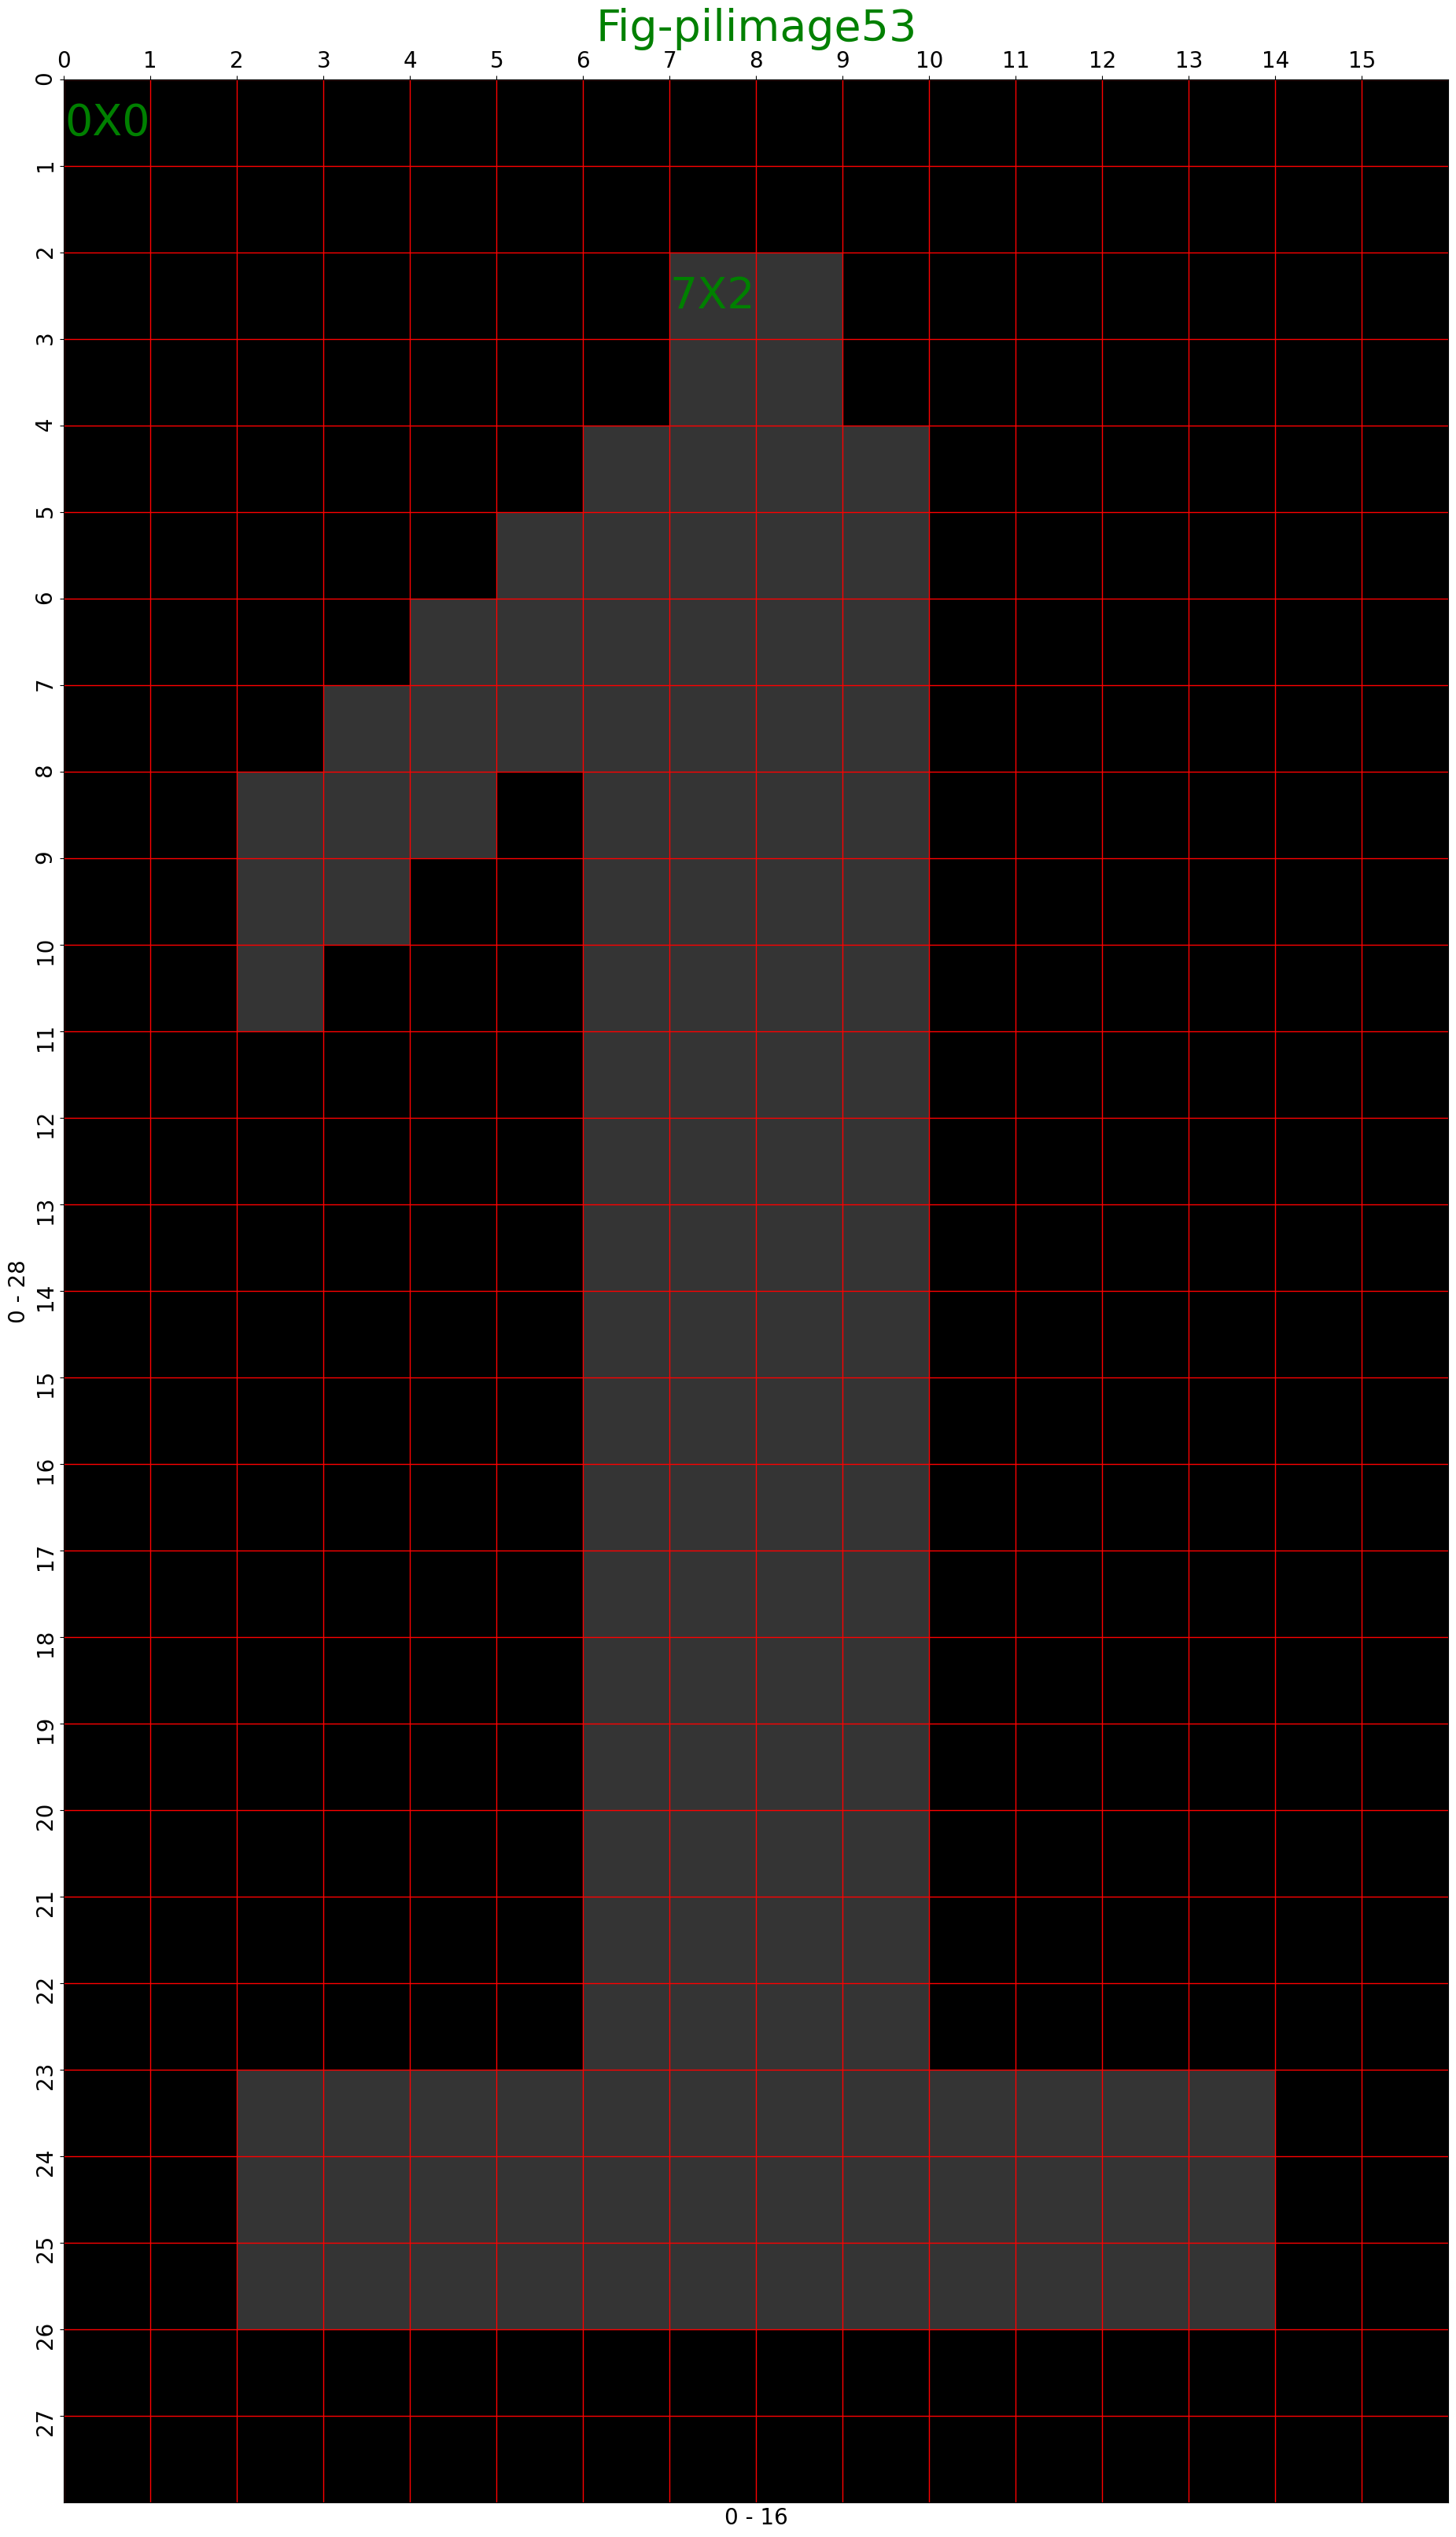

In [13]:
plt.figure(figsize=(28*2.5,16*2.5))
pilimage53= Image.fromarray(arrayPixelVale53)
plt.imshow(pilimage53,cmap='gray',vmin=0,vmax=255, extent=[0, 16, 28, 0])
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.xlabel('0 - 16',fontsize=20)
plt.ylabel('0 - 28',fontsize=20)
plt.title("Fig-pilimage53", fontsize=40, color="green")
plt.yticks(np.arange(0, 28, step=1),fontsize=20,rotation=90)
plt.xticks(np.arange(0, 16, step=1),fontsize=20,rotation=360)
plt.grid(axis='both',color='r', linestyle='-', linewidth=1)
plt.text(0.5,0.5,"0X0",fontsize=40, color='g',horizontalalignment='center',verticalalignment='center')
plt.text(7.5,2.5,"7X2",fontsize=40, color='g',horizontalalignment='center',verticalalignment='center')
plt.savefig('pilimage53.png')
print("0X0 pixel value :", pilimage53.getpixel((0,0)), "\n7X2 pixel value :", pilimage53.getpixel((7,2)))
plt.show()

In [14]:
arrayPixelVale204= np.where(array==0,0,204).astype(np.uint8)
print("arrayPixelVale204.shape :",arrayPixelVale204.shape)
print("arrayPixelVale204.dtype :",arrayPixelVale204.dtype)
print("arrayPixelVale204[2][7] :",arrayPixelVale204[2][7])
print(arrayPixelVale204)

arrayPixelVale204.shape : (28, 16)
arrayPixelVale204.dtype : uint8
arrayPixelVale204[2][7] : 204
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 204 204   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 204 204   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 204 204 204 204   0   0   0   0   0   0]
 [  0   0   0   0   0 204 204 204 204 204   0   0   0   0   0   0]
 [  0   0   0   0 204 204 204 204 204 204   0   0   0   0   0   0]
 [  0   0   0 204 204 204 204 204 204 204   0   0   0   0   0   0]
 [  0   0 204 204 204   0 204 204 204 204   0   0   0   0   0   0]
 [  0   0 204 204   0   0 204 204 204 204   0   0   0   0   0   0]
 [  0   0 204   0   0   0 204 204 204 204   0   0   0   0   0   0]
 [  0   0   0   0   0   0 204 204 204 204   0   0   0   0   0   0]
 [  0   0   0   0   0   0 204 204 204 204   0   0   0   0   0   0]
 [  0   0   0   0   0   0 204 20

0X0 pixel value : 0 
7X2 pixel value : 204


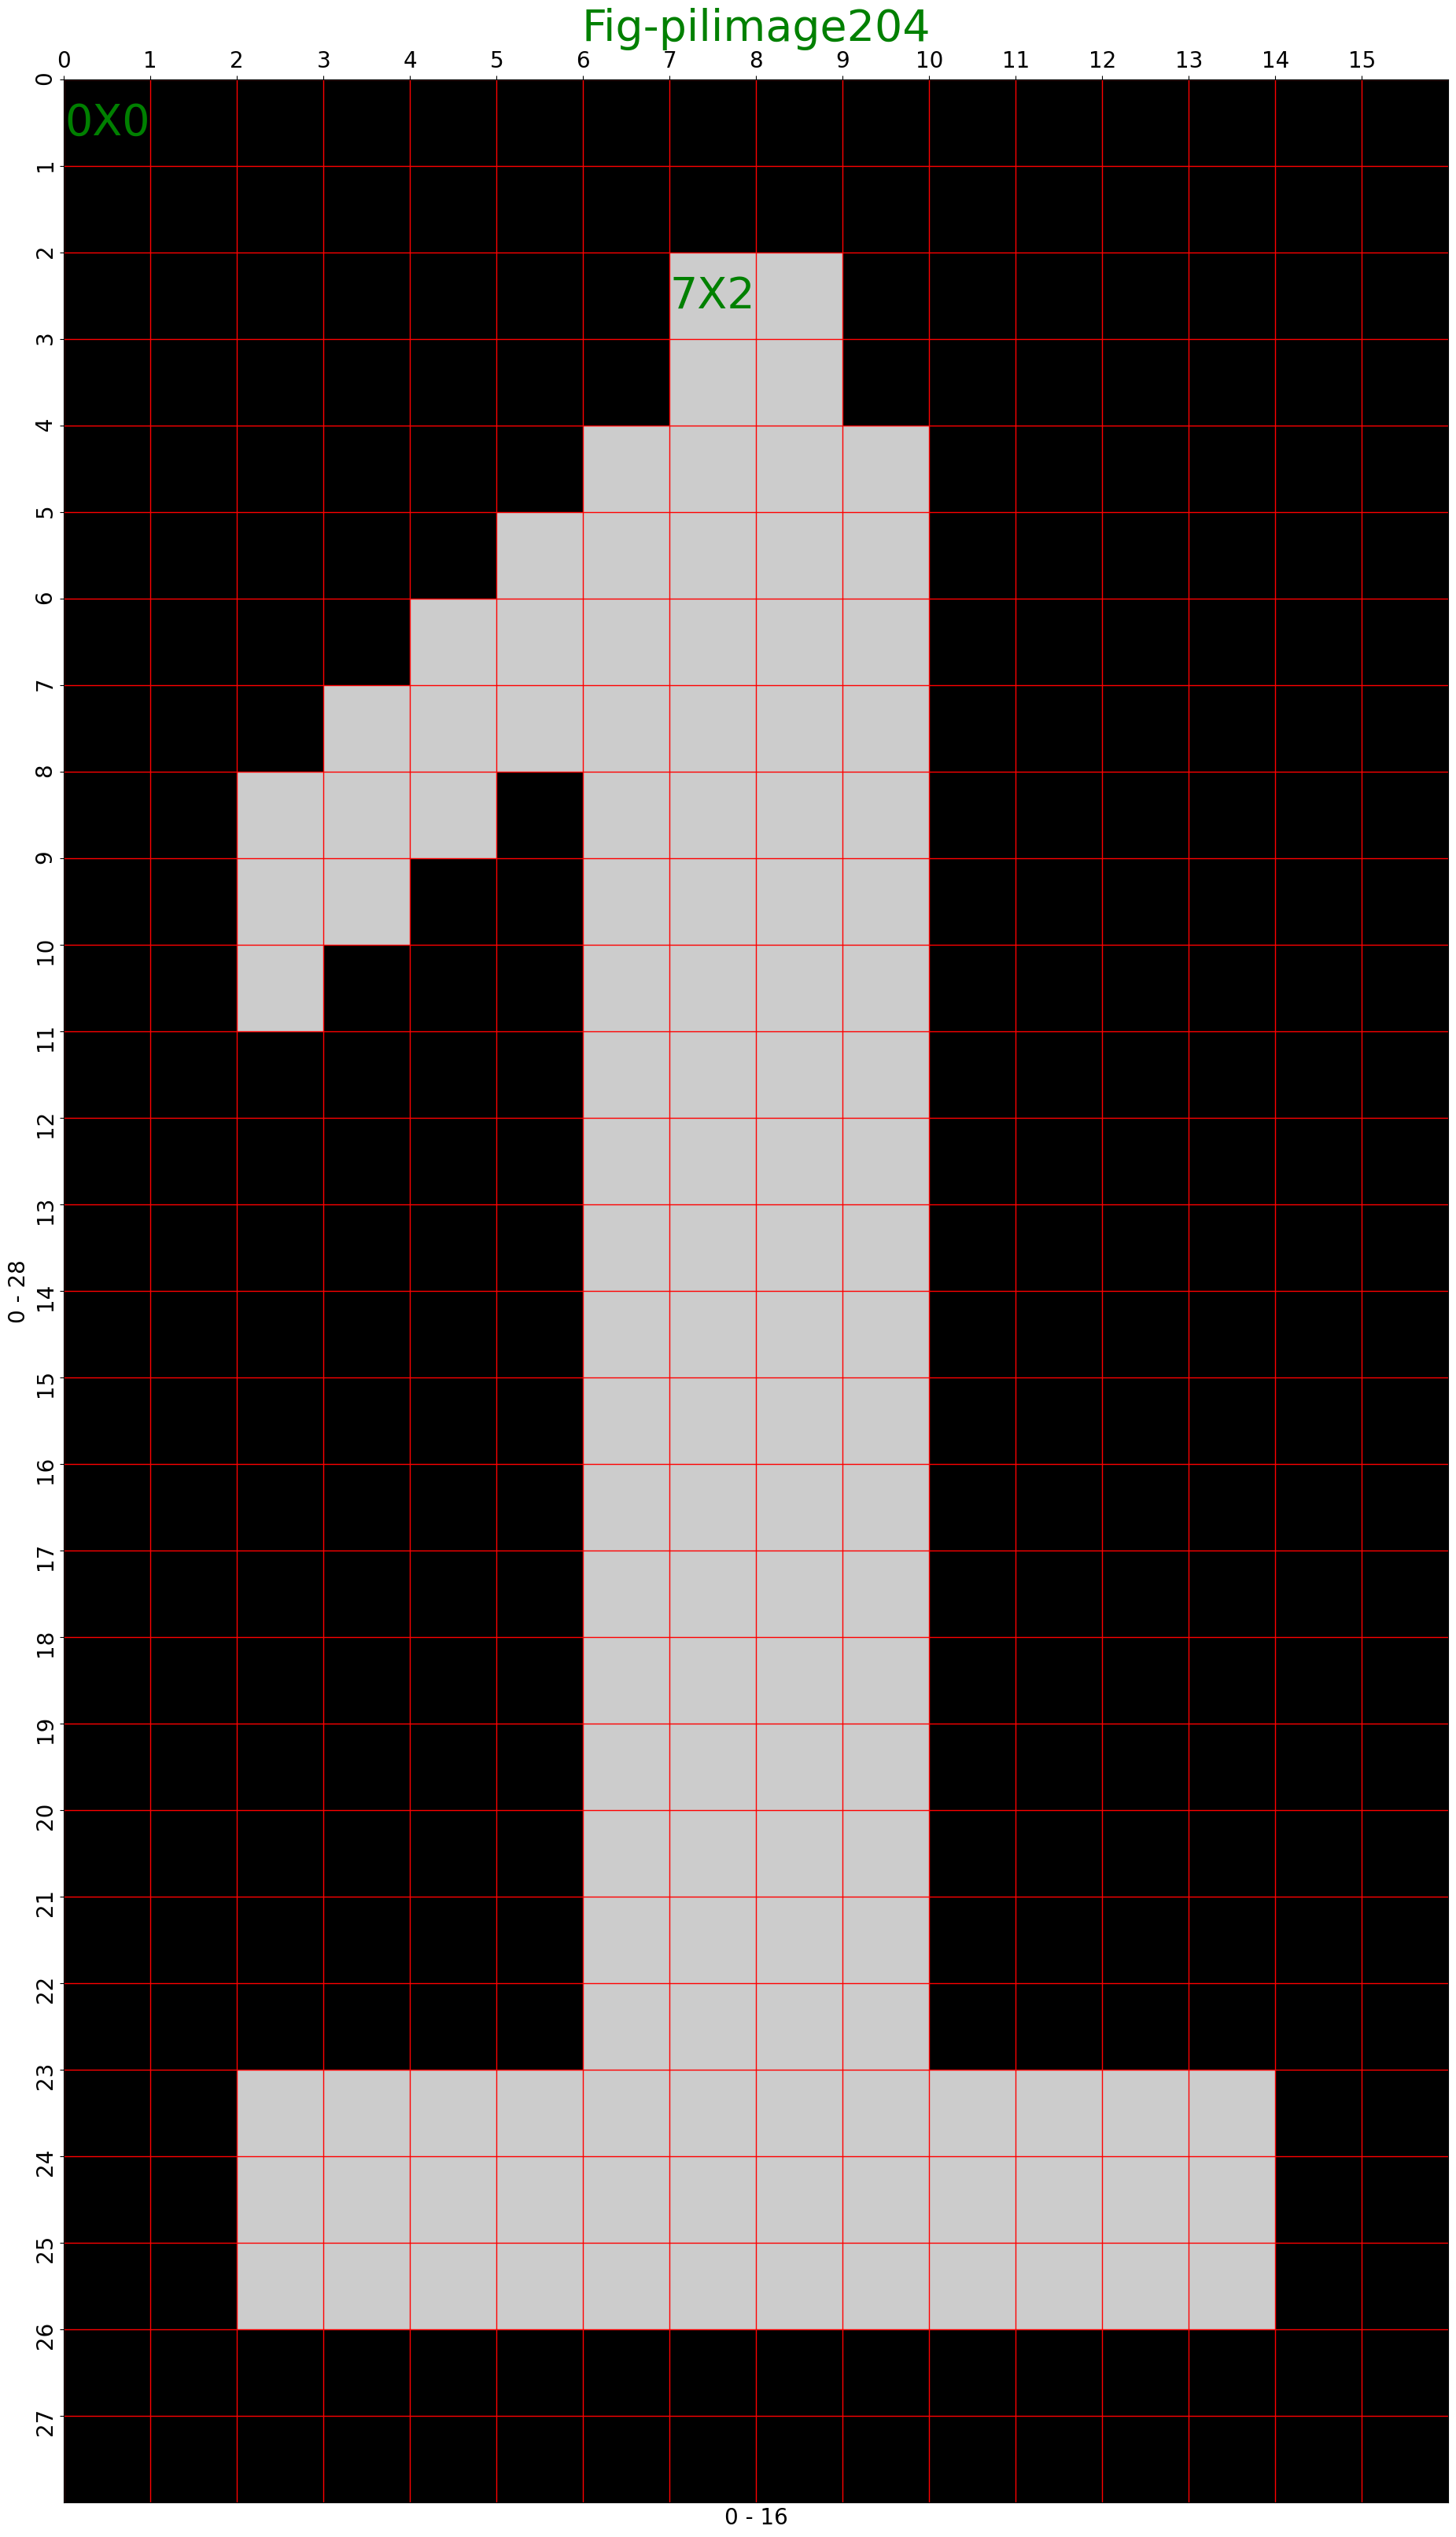

In [15]:
plt.figure(figsize=(28*2.5,16*2.5))
pilimage204= Image.fromarray(arrayPixelVale204)
plt.imshow(pilimage204,cmap='gray',vmin=0,vmax=255, extent=[0, 16, 28, 0])
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.xlabel('0 - 16',fontsize=20)
plt.ylabel('0 - 28',fontsize=20)
plt.title("Fig-pilimage204", fontsize=40, color="green")
plt.yticks(np.arange(0, 28, step=1),fontsize=20,rotation=90)
plt.xticks(np.arange(0, 16, step=1),fontsize=20,rotation=360)
plt.grid(axis='both',color='r', linestyle='-', linewidth=1)
plt.text(0.5,0.5,"0X0",fontsize=40, color='g',horizontalalignment='center',verticalalignment='center')
plt.text(7.5,2.5,"7X2",fontsize=40, color='g',horizontalalignment='center',verticalalignment='center')
plt.savefig('pilimage204.png')
print("0X0 pixel value :", pilimage204.getpixel((0,0)), "\n7X2 pixel value :", pilimage204.getpixel((7,2)))
plt.show()

In [16]:
arrayPixelVale59= np.where(array==0,0,59).astype(np.uint8)
print("arrayPixelVale59.shape :",arrayPixelVale59.shape)
print("arrayPixelVale59.dtype :",arrayPixelVale59.dtype)
print("arrayPixelVale59[2][7] :",arrayPixelVale59[2][7])
print(arrayPixelVale59)

arrayPixelVale59.shape : (28, 16)
arrayPixelVale59.dtype : uint8
arrayPixelVale59[2][7] : 59
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 59 59  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 59 59  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0  0  0 59 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0  0 59 59 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0 59 59 59 59 59 59 59  0  0  0  0  0  0]
 [ 0  0 59 59 59  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0 59 59  0  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0 59  0  0  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 59 59 59 59  0  0  0

0X0 pixel value : 0 
7X2 pixel value : 59


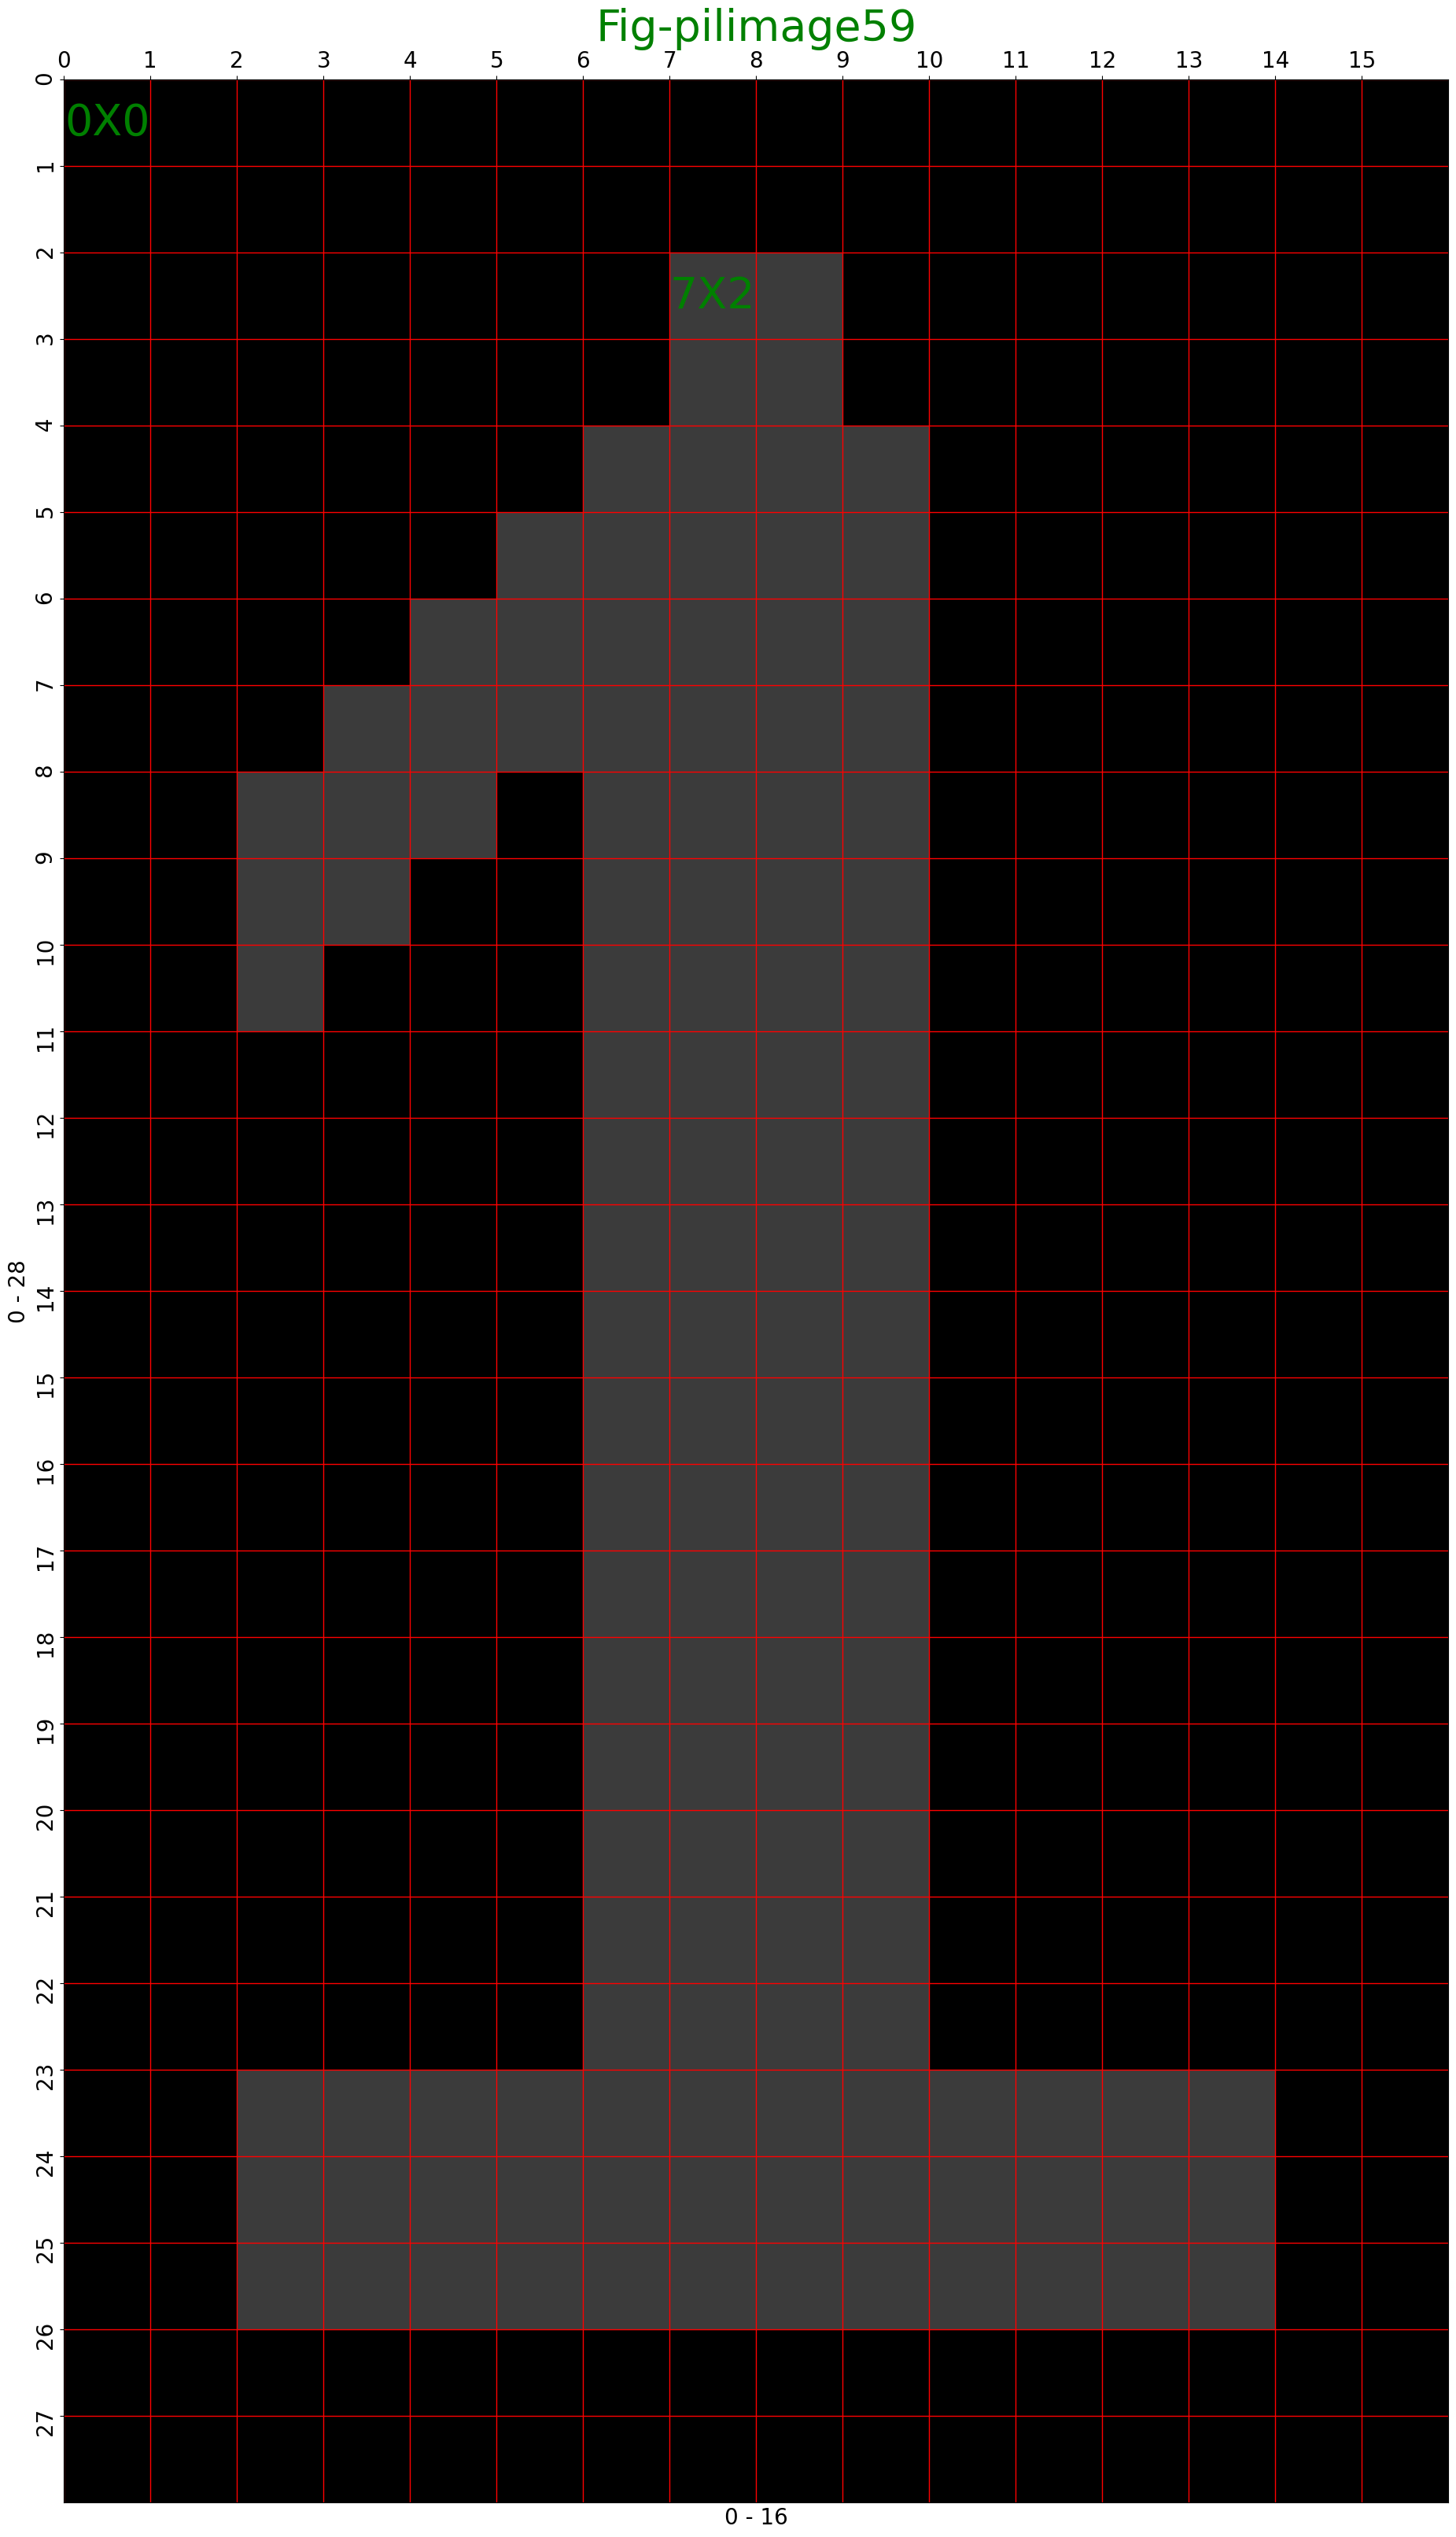

In [17]:
plt.figure(figsize=(28*2.5,16*2.5))
pilimage59= Image.fromarray(arrayPixelVale59)
plt.imshow(pilimage59,cmap='gray',vmin=0,vmax=255, extent=[0, 16, 28, 0])
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.xlabel('0 - 16',fontsize=20)
plt.ylabel('0 - 28',fontsize=20)
plt.title("Fig-pilimage59", fontsize=40, color="green")
plt.yticks(np.arange(0, 28, step=1),fontsize=20,rotation=90)
plt.xticks(np.arange(0, 16, step=1),fontsize=20,rotation=360)
plt.grid(axis='both',color='r', linestyle='-', linewidth=1)
plt.text(0.5,0.5,"0X0",fontsize=40, color='g',horizontalalignment='center',verticalalignment='center')
plt.text(7.5,2.5,"7X2",fontsize=40, color='g',horizontalalignment='center',verticalalignment='center')
plt.savefig('pilimage59.png')
print("0X0 pixel value :", pilimage59.getpixel((0,0)), "\n7X2 pixel value :", pilimage59.getpixel((7,2)))
plt.show()

arrayPixelVale53 for RED , arrayPixelVale204 for GREEN and arrayPixelVale59 for BLUE.
arrayPixelVale53 contained values 0 and 53
arrayPixelVale204 contained values 0 and 204
arrayPixelVale59 contained values 0 and 59
The bled of this color value will be seen https://www.w3schools.com/colors/colors_rgb.asp

In [18]:
arrayRGB = np.dstack((arrayPixelVale53, arrayPixelVale204,arrayPixelVale59))
print("arrayRGB.shape :",arrayRGB.shape)
print("arrayRGB[2][7] :",arrayRGB[2][7])
print(arrayRGB)

arrayRGB.shape : (28, 16, 3)
arrayRGB[2][7] : [ 53 204  59]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [ 53 204  59]
  ...
  [ 53 204  59]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


Same color as we see at https://www.w3schools.com/colors/colors_rgb.asp

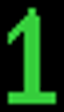

In [19]:
pilimage = Image.fromarray(arrayRGB)
pilimage.resize((64,112))

Now we try to marge another channel alpha channel responsible for transparency of color. For that we will choose 127 which mid value of 0 to 255.  If 0 for black and 255 for white then we may imagine 127 for dim color. 

In [20]:
arrayPixelVale127= np.where(array==0,127,127).astype(np.uint8)
print(arrayPixelVale127)

[[127 127 127 127 127 127 127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127 127 127 127 127 127 

In [21]:
arrayRGBA = np.dstack((arrayPixelVale53, arrayPixelVale204,arrayPixelVale59,arrayPixelVale127))
print(arrayRGBA)

[[[  0   0   0 127]
  [  0   0   0 127]
  [  0   0   0 127]
  ...
  [  0   0   0 127]
  [  0   0   0 127]
  [  0   0   0 127]]

 [[  0   0   0 127]
  [  0   0   0 127]
  [  0   0   0 127]
  ...
  [  0   0   0 127]
  [  0   0   0 127]
  [  0   0   0 127]]

 [[  0   0   0 127]
  [  0   0   0 127]
  [  0   0   0 127]
  ...
  [  0   0   0 127]
  [  0   0   0 127]
  [  0   0   0 127]]

 ...

 [[  0   0   0 127]
  [  0   0   0 127]
  [ 53 204  59 127]
  ...
  [ 53 204  59 127]
  [  0   0   0 127]
  [  0   0   0 127]]

 [[  0   0   0 127]
  [  0   0   0 127]
  [  0   0   0 127]
  ...
  [  0   0   0 127]
  [  0   0   0 127]
  [  0   0   0 127]]

 [[  0   0   0 127]
  [  0   0   0 127]
  [  0   0   0 127]
  ...
  [  0   0   0 127]
  [  0   0   0 127]
  [  0   0   0 127]]]


four channel RBG and Alpha. We can check it from https://rgbacolorpicker.com/

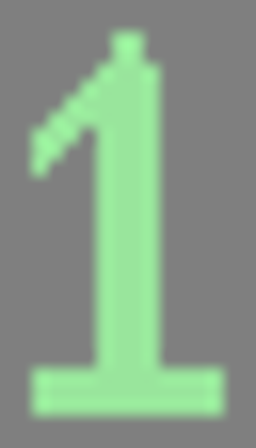

In [22]:
pilimage = Image.fromarray(arrayRGBA)
pilimage.resize((64*4,112*4))

In [23]:
pilimage.save('pilimage.PNG')

In [24]:
pillimageOpen= Image.open('pilimage.PNG')

In [25]:
pillimageOpen.getbands()

('R', 'G', 'B', 'A')

In [26]:
 R, G, B, A = pillimageOpen.split()

In [27]:
REDchannel=np.array(R)
print(REDchannel)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 53 53  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 53 53  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 53 53 53 53  0  0  0  0  0  0]
 [ 0  0  0  0  0 53 53 53 53 53  0  0  0  0  0  0]
 [ 0  0  0  0 53 53 53 53 53 53  0  0  0  0  0  0]
 [ 0  0  0 53 53 53 53 53 53 53  0  0  0  0  0  0]
 [ 0  0 53 53 53  0 53 53 53 53  0  0  0  0  0  0]
 [ 0  0 53 53  0  0 53 53 53 53  0  0  0  0  0  0]
 [ 0  0 53  0  0  0 53 53 53 53  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 53 53 53 53  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 53 53 53 53  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 53 53 53 53  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 53 53 53 53  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 53 53 53 53  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 53 53 53 53  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 53 53 53 53  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 53 53 53 53  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 53 53 53 53

In [28]:
GREENchannel=np.array(G)
print(GREENchannel)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 204 204   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 204 204   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 204 204 204 204   0   0   0   0   0   0]
 [  0   0   0   0   0 204 204 204 204 204   0   0   0   0   0   0]
 [  0   0   0   0 204 204 204 204 204 204   0   0   0   0   0   0]
 [  0   0   0 204 204 204 204 204 204 204   0   0   0   0   0   0]
 [  0   0 204 204 204   0 204 204 204 204   0   0   0   0   0   0]
 [  0   0 204 204   0   0 204 204 204 204   0   0   0   0   0   0]
 [  0   0 204   0   0   0 204 204 204 204   0   0   0   0   0   0]
 [  0   0   0   0   0   0 204 204 204 204   0   0   0   0   0   0]
 [  0   0   0   0   0   0 204 204 204 204   0   0   0   0   0   0]
 [  0   0   0   0   0   0 204 204 204 204   0   0   0   0   0   0]
 [  0   0   0   0   0   0 204 204 204 204   0   0   0   0   0 

In [29]:
BLUEchannel=np.array(B)
print(BLUEchannel)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 59 59  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 59 59  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0  0  0 59 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0  0 59 59 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0 59 59 59 59 59 59 59  0  0  0  0  0  0]
 [ 0  0 59 59 59  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0 59 59  0  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0 59  0  0  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 59 59 59 59

In [30]:
ALPHAhannel=np.array(B)
print(ALPHAhannel)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 59 59  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 59 59  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0  0  0 59 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0  0 59 59 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0 59 59 59 59 59 59 59  0  0  0  0  0  0]
 [ 0  0 59 59 59  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0 59 59  0  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0 59  0  0  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 59 59 59 59  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 59 59 59 59

# So far as I discussed, How  number of array construct a single band/ channel image gray image. Merging three channel / band image constructing a RBG colorful Image. How numbers blending forms a colorful image. Finally, to control a transparency of a colorful image adding new aloha channel/ band. 

https://www.w3schools.com/python/
https://numpy.org/doc/
https://rgbacolorpicker.com/
https://www.geeksforgeeks.org/